In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.api as sm
import statsmodels.formula.api as smf

import warnings
warnings.filterwarnings(action = 'ignore')

In [2]:
startups_data = pd.read_csv('50_Startups.csv')
startups_data

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


## Exploratory Data Analysis:-

In [3]:
startups_data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
startups_data.shape

(50, 5)

In [5]:
startups_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


#### There is no null entries/values in the data.

In [6]:
startups_data[startups_data.duplicated()]

,R&D Spend,Administration,Marketing Spend,State,Profit


#### There is also no dublicate values in the data.

### Correlation Analysis of the data;-

In [7]:
startups_data.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


In [8]:
startups_data.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

### Creating Dummy Variables for the Categorical Columns:- 

In [9]:
startups_new_data=pd.get_dummies(startups_data,columns=['State'])
startups_new_data

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0
5,131876.90,99814.71,362861.36,156991.12,0,0,1
6,134615.46,147198.87,127716.82,156122.51,1,0,0
7,130298.13,145530.06,323876.68,155752.60,0,1,0
8,120542.52,148718.95,311613.29,152211.77,0,0,1
9,123334.88,108679.17,304981.62,149759.96,1,0,0


In [10]:
startups_new_data.columns=['RnD_Spend','Administration','Marketing_Spend','Profit','State_California','State_Florida','State_NewYork']

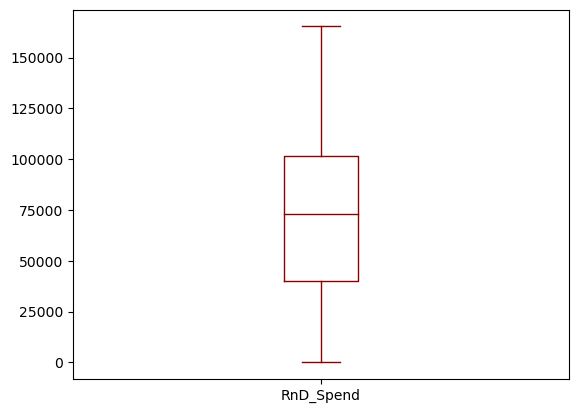

In [13]:
startups_new_data['RnD_Spend'].plot(kind='box',color = 'darkred')
plt.show()

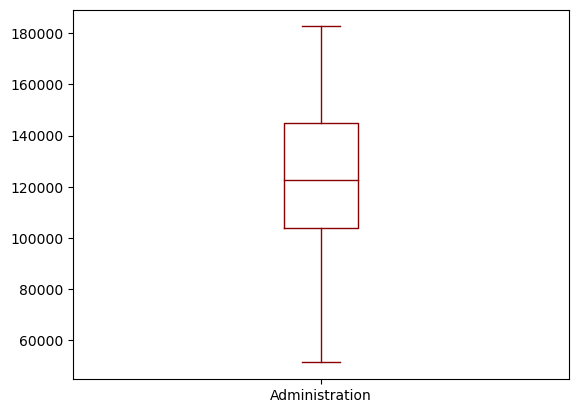

In [14]:
startups_new_data['Administration'].plot(kind='box',color = 'darkred')
plt.show()

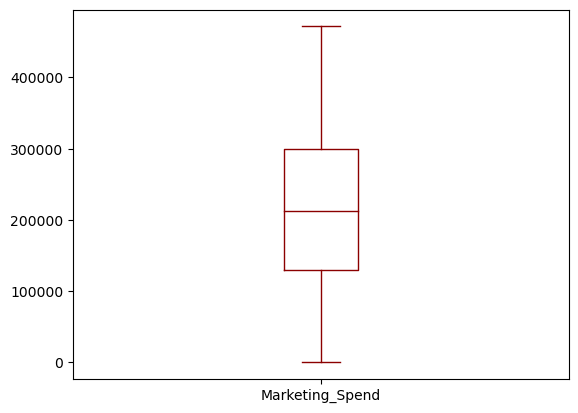

In [15]:
startups_new_data['Marketing_Spend'].plot(kind='box',color = 'darkred')
plt.show()

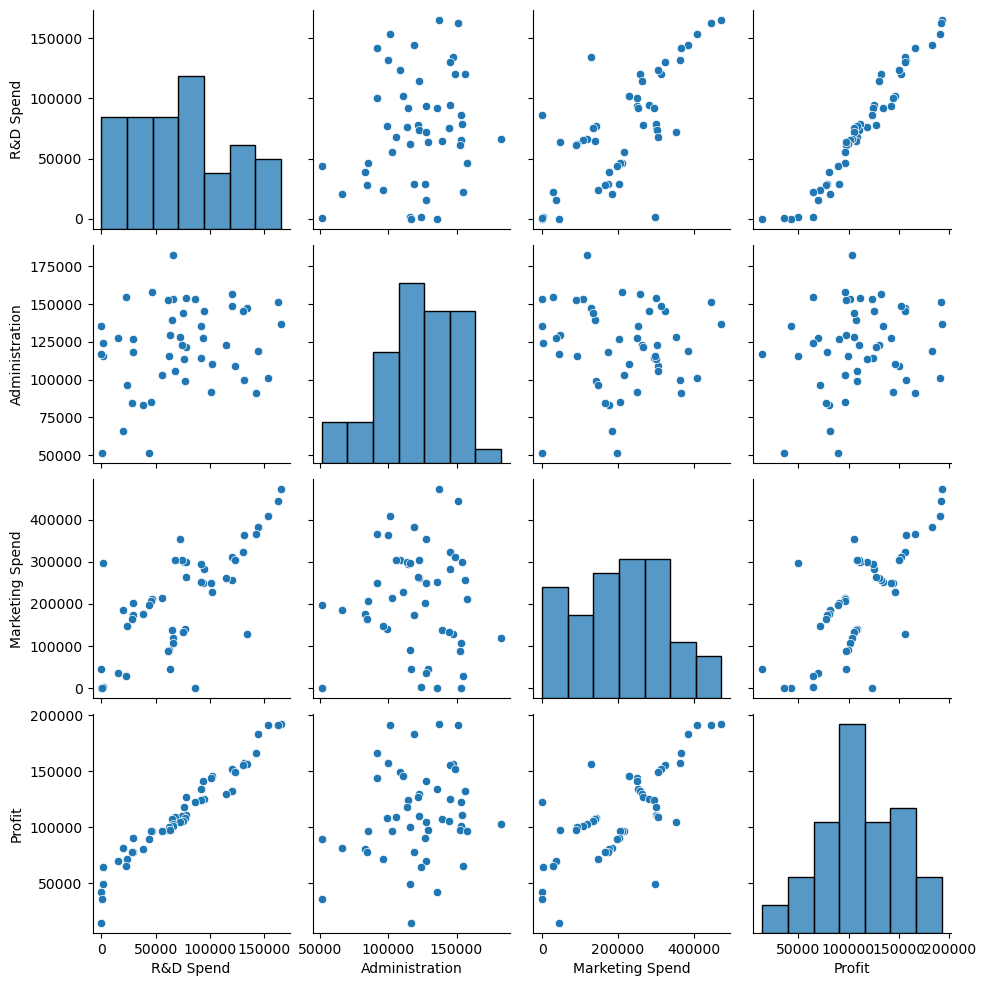

In [17]:
sns.pairplot(startups_data.iloc[:,:5])
plt.show()

In [18]:
startups_new_data.corr()

,RnD_Spend,Administration,Marketing_Spend,Profit,State_California,State_Florida,State_NewYork
RnD_Spend,1.000000,0.241955,0.724248,0.972900,-0.143165,0.105711,0.039068
Administration,0.241955,1.000000,-0.032154,0.200717,-0.015478,0.010493,0.005145
Marketing_Spend,0.724248,-0.032154,1.000000,0.747766,-0.168875,0.205685,-0.033670
Profit,0.972900,0.200717,0.747766,1.000000,-0.145837,0.116244,0.031368
State_California,-0.143165,-0.015478,-0.168875,-0.145837,1.000000,-0.492366,-0.515152
State_Florida,0.105711,0.010493,0.205685,0.116244,-0.492366,1.000000,-0.492366
State_NewYork,0.039068,0.005145,-0.033670,0.031368,-0.515152,-0.492366,1.000000


### Creating New Columns which are Transformation for Existing Columns:-

In [19]:
startups_new_data['admin_sq']=startups_new_data.Administration**2
startups_new_data['admin_sqrt']=startups_new_data.Administration**0.5
startups_new_data['admin_log']=np.log(startups_new_data.Administration)
startups_new_data['mar_sq']=startups_new_data.Marketing_Spend**2
startups_new_data['mar_sqrt']=startups_new_data.Marketing_Spend**0.5
startups_new_data['mar_log']=np.log(startups_new_data.Marketing_Spend)
startups_new_data['rnd_sq']=startups_new_data.RnD_Spend**2
startups_new_data['rnd_sqrt']=startups_new_data.RnD_Spend**0.5
startups_new_data['rnd_log']=np.log(startups_new_data.RnD_Spend)   

startups_new_data

,RnD_Spend,Administration,Marketing_Spend,Profit,State_California,State_Florida,State_NewYork,admin_sq,admin_sqrt,admin_log,mar_sq,mar_sqrt,mar_log,rnd_sq,rnd_sqrt,rnd_log
0,165349.20,136897.80,471784.10,192261.83,0,0,1,1.874101e+10,369.997027,11.826990,2.225802e+11,686.865416,13.064277,2.734036e+10,406.631529,12.015815
1,162597.70,151377.59,443898.53,191792.06,1,0,0,2.291517e+10,389.072731,11.927533,1.970459e+11,666.257105,13.003351,2.643801e+10,403.234051,11.999034
2,153441.51,101145.55,407934.54,191050.39,0,1,0,1.023042e+10,318.033882,11.524316,1.664106e+11,638.697534,12.918862,2.354430e+10,391.716109,11.941075
3,144372.41,118671.85,383199.62,182901.99,0,0,1,1.408301e+10,344.487808,11.684117,1.468419e+11,619.031195,12.856311,2.084339e+10,379.963696,11.880151
4,142107.34,91391.77,366168.42,166187.94,0,1,0,8.352456e+09,302.310718,11.422911,1.340793e+11,605.118517,12.810849,2.019450e+10,376.971272,11.864338
5,131876.90,99814.71,362861.36,156991.12,0,0,1,9.962976e+09,315.934661,11.511071,1.316684e+11,602.379747,12.801776,1.739152e+10,363.148592,11.789624
6,134615.46,147198.87,127716.82,156122.51,1,0,0,2.166751e+10,383.665049,11.899540,1.631159e+10,357.374901,11.757571,1.812132e+10,366.899796,11.810178
7,130298.13,145530.06,323876.68,155752.60,0,1,0,2.117900e+10,381.484023,11.888138,1.048961e+11,569.101643,12.688118,1.697760e+10,360.968323,11.777580
8,120542.52,148718.95,311613.29,152211.77,0,0,1,2.211733e+10,385.640960,11.909814,9.710284e+10,558.223333,12.649518,1.453050e+10,347.192339,11.699758
9,123334.88,108679.17,304981.62,149759.96,1,0,0,1.181116e+10,329.665239,11.596155,9.301379e+10,552.251410,12.628007,1.521149e+10,351.190660,11.722659


### Mode Creation with Untransformed Columns:-

In [20]:
model=smf.ols('Profit~RnD_Spend+Administration+Marketing_Spend+State_California+State_Florida+State_NewYork',data=startups_new_data).fit()

In [21]:
model.fittedvalues

0     192390.571365
1     189071.320106
2     182276.186735
3     173584.976191
4     172277.133819
5     163473.807120
6     158099.292789
7     160155.644651
8     151634.743327
9     154829.662529
10    135664.642592
11    135528.600783
12    129282.917807
13    127431.248986
14    149694.382777
15    146143.635515
16    116854.074528
17    130085.409933
18    129149.725742
19    115594.188411
20    116570.734439
21    117201.505088
22    114833.305137
23    110123.796104
24    113294.373453
25    102200.268919
26    110765.301170
27    114279.804028
28    101818.587387
29    101721.042030
30     99629.010538
31     97617.296321
32     98988.236605
33     98061.358947
34     88974.704161
35     90420.009605
36     75423.092863
37     89577.702221
38     69606.521607
39     83684.976039
40     74762.746174
41     74956.311047
42     70575.993712
43     60100.268218
44     64585.147212
45     47588.364708
46     56272.992679
47     46468.232003
48     49123.073082
49     48185.038790


In [22]:
model.rsquared

0.9507524843355148

### Test for Normality of Residuals (Q-Q Plot) using Residual Model:-

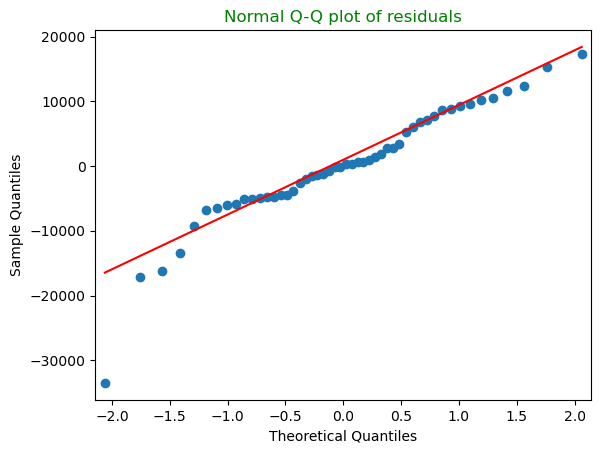

In [24]:
qqplot=sm.qqplot(model.resid,line='q')
plt.title('Normal Q-Q plot of residuals', color = 'green')
plt.show()

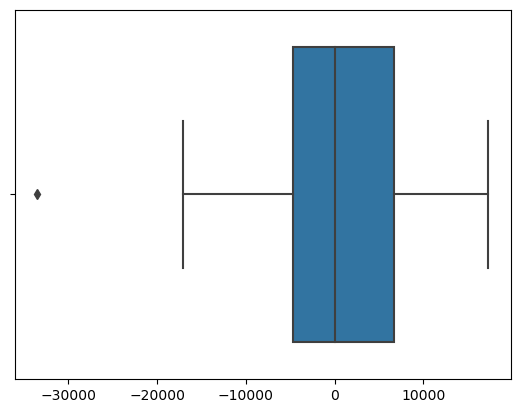

In [25]:
sns.boxplot(model.resid)
plt.show()

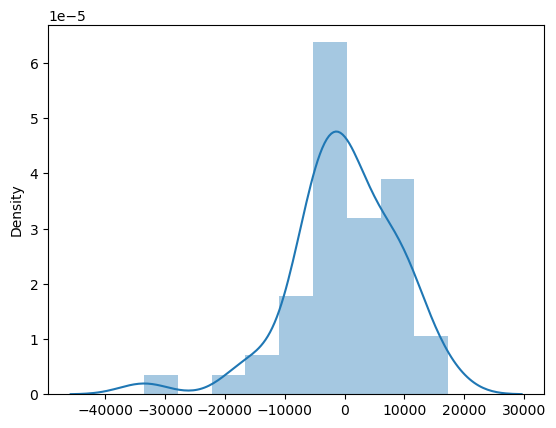

In [26]:
sns.distplot(model.resid)
plt.show()

### Test for Homoscedasticity and Heteroscedasticity (Plotting Models Standardized fitted Values Vs Standardized Residual Values):-

In [27]:
def get_standardized_values(vals):
    return (vals - vals.mean())/vals.std()

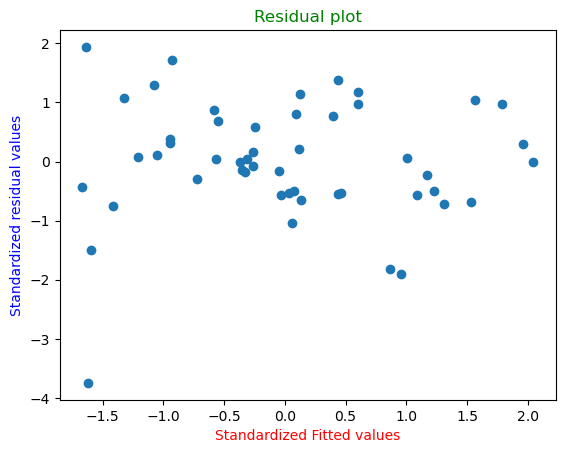

In [28]:
plt.scatter(get_standardized_values(model.fittedvalues),get_standardized_values(model.resid))


plt.title('Residual plot', color = 'green')
plt.xlabel('Standardized Fitted values', color = 'red')
plt.ylabel('Standardized residual values', color = 'blue')
plt.show()    

In [29]:
model.pvalues

Intercept           2.807645e-09
RnD_Spend           2.578772e-21
Administration      6.077373e-01
Marketing_Spend     1.226769e-01
State_California    6.942555e-06
State_Florida       2.992503e-05
State_NewYork       9.409010e-06
dtype: float64

#### Administration and Marketing Spend has higher P-Values, particularly Administration has P-Value of 60%.

### Model Validation Techniques:-

#### Collinearity Problem Check.

In [30]:
rsd_admin = smf.ols('Administration~RnD_Spend+Marketing_Spend+State_California+State_Florida+State_NewYork',data=startups_new_data).fit().rsquared
vif_admin = 1/(1-rsd_admin)

rsd_rnd = smf.ols('RnD_Spend~Administration+Marketing_Spend+State_California+State_Florida+State_NewYork',data=startups_new_data).fit().rsquared
vif_rnd = 1/(1-rsd_rnd)

rsq_mar = smf.ols('Marketing_Spend~RnD_Spend+Administration+State_California+State_Florida+State_NewYork',data=startups_new_data).fit().rsquared
vif_mar = 1/(1-rsq_mar)


#Storing vif value in a data frame

d1 = {'Variables':['admin','rnd','mar'],'VIF':[vif_admin,vif_rnd,vif_mar]}
vif_frame = pd.DataFrame(d1)
vif_frame

,Variables,VIF
0,admin,1.177766
1,rnd,2.495511
2,mar,2.416797


### Calculating Cook's Distance and checking the P-Values above the Leverage Cuttoff Value:-

### Leverage Cuttoff Value  = 3*(k+1)/n

#### where, k= no. of features/columns and n = no. of datapoints.

In [31]:
model_influence = model.get_influence()
(c,_) = model_influence.cooks_distance
k=6
n=50
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff
for i in c:
    if i>leverage_cutoff:
        print(i)
print(c)   

[6.58235386e-06 3.39430615e-03 2.39098625e-02 2.02032949e-02
 1.20198420e-02 1.00370545e-02 2.13697865e-03 3.57036535e-03
 6.25257579e-05 5.41213370e-03 1.89764313e-02 1.65867572e-02
 1.82797330e-02 6.34364572e-03 6.17285106e-02 3.72134923e-02
 1.35078103e-02 3.71193311e-03 2.94854637e-03 2.81922632e-02
 6.02783698e-04 1.00287995e-02 3.02178458e-03 3.16115938e-04
 4.34597714e-03 3.56884817e-03 4.96640589e-03 2.78597505e-02
 9.20897921e-04 9.83021753e-05 2.28936702e-05 3.65145588e-06
 5.61582965e-04 2.31043413e-04 1.79909587e-02 7.13289876e-03
 5.07832731e-02 6.16526092e-05 4.78300794e-02 1.37854568e-03
 1.94676476e-03 1.88154422e-03 1.42427115e-04 2.00561912e-02
 1.00026060e-04 8.09098154e-02 3.62771434e-02 3.84131479e-03
 1.34036686e-01 2.26250945e-01]


#### All values are blow the leverage cuttoff points.

### Creating Models with different transformed columns instead  of Administratiom column:-

In [32]:
model_admin_sq=smf.ols('Profit~RnD_Spend+admin_sq+Marketing_Spend+State_California+State_Florida+State_NewYork',data=startups_new_data).fit()
model_admin_sqrt=smf.ols('Profit~RnD_Spend+admin_sqrt+Marketing_Spend+State_California+State_Florida+State_NewYork',data=startups_new_data).fit()
model_admin_log=smf.ols('Profit~RnD_Spend+admin_log+Marketing_Spend+State_California+State_Florida+State_NewYork',data=startups_new_data).fit()

In [33]:
print(model_admin_sq.pvalues,model_admin_sqrt.pvalues,model_admin_log.pvalues,sep='\n')

Intercept           2.517322e-14
RnD_Spend           2.460902e-21
admin_sq            5.652020e-01
Marketing_Spend     1.349188e-01
State_California    5.940661e-07
State_Florida       4.665382e-06
State_NewYork       1.212163e-06
dtype: float64
Intercept           7.161532e-05
RnD_Spend           2.528063e-21
admin_sqrt          6.441167e-01
Marketing_Spend     1.147103e-01
State_California    4.975101e-04
State_Florida       9.062034e-04
State_NewYork       4.963419e-04
dtype: float64
Intercept           2.619110e-01
RnD_Spend           2.388318e-21
admin_log           6.921231e-01
Marketing_Spend     1.062041e-01
State_California    2.656939e-01
State_Florida       2.656507e-01
State_NewYork       2.645709e-01
dtype: float64


### Even when transformation applied, the P-Value is very high. Thus, Eliminating the Administration Column:-

In [34]:
model1=smf.ols('Profit~RnD_Spend+Marketing_Spend+State_California+State_Florida+State_NewYork',data=startups_new_data).fit()

In [35]:
model_mar_sq=smf.ols('Profit~RnD_Spend+mar_sq+State_California+State_Florida+State_NewYork',data=startups_new_data).fit()
model_mar_sqrt=smf.ols('Profit~RnD_Spend+mar_sqrt+State_California+State_Florida+State_NewYork',data=startups_new_data).fit()

In [36]:
print(model_mar_sq.pvalues,model_mar_sqrt.pvalues,model1.pvalues,sep='\n')

Intercept           3.286941e-23
RnD_Spend           1.725308e-22
mar_sq              1.482270e-01
State_California    1.151792e-07
State_Florida       1.853318e-07
State_NewYork       4.591356e-07
dtype: float64
Intercept           9.373589e-16
RnD_Spend           2.420487e-24
mar_sqrt            8.237836e-02
State_California    1.917196e-06
State_Florida       2.734192e-05
State_NewYork       9.515707e-07
dtype: float64
Intercept           5.420201e-21
RnD_Spend           6.509785e-23
Marketing_Spend     7.204640e-02
State_California    2.004515e-07
State_Florida       1.970877e-06
State_NewYork       4.720949e-07
dtype: float64


### P-Values of Marketing Spend is higher than the 5% in all the transformation also in the untransformed data. 
  ### Thus, Marketing Spend column will be eliminated.

### Calculating Cook's Distance and Checking P-Values above the Leverage Cuttoff:-

In [37]:
model_influence = model1.get_influence()
(c, _) = model_influence.cooks_distance
k=5
n=50
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff
for i in c:
    if i>leverage_cutoff:
        print(i)
print(c)    
print(leverage_cutoff)

[9.36302693e-05 2.04471945e-03 2.59309540e-02 2.45448548e-02
 5.92472096e-03 7.71147801e-03 2.31137569e-03 4.61187082e-03
 2.82464255e-07 4.44612822e-03 2.08324844e-02 1.47599455e-02
 2.15371949e-02 6.27957407e-03 6.49573491e-02 4.24018186e-02
 1.54566352e-02 4.29524836e-03 3.17863986e-03 3.12219200e-02
 6.93418996e-04 9.21045140e-03 3.83896203e-03 2.93929630e-04
 2.48295864e-03 3.26945439e-03 6.31640990e-03 3.22658862e-02
 3.82922600e-07 3.39123158e-04 1.40869788e-04 1.19675217e-04
 5.48795206e-04 1.29348856e-04 6.89992838e-03 7.93657634e-03
 4.97609857e-02 6.41180255e-04 4.31680145e-02 5.51338381e-04
 1.92148634e-03 2.68835363e-03 3.08552920e-04 2.18841144e-02
 1.58350809e-05 9.20442792e-02 4.56219781e-02 5.17009789e-03
 4.33768102e-02 2.68318650e-01]
0.36


#### All values are below the leverage cuttoff.

## Improving the Model:-

### Building Model with different transformations of the RnD Spending Column:-

In [38]:
model2=smf.ols('Profit~RnD_Spend+State_California+State_Florida+State_NewYork',data=startups_new_data).fit()

In [39]:
model2.rsquared

0.9467168588373375

In [40]:
model2.pvalues

Intercept           3.145656e-23
RnD_Spend           1.078480e-30
State_California    2.205806e-07
State_Florida       1.714253e-07
State_NewYork       4.913660e-07
dtype: float64

In [41]:
print(model2.mse_resid)

92208584.51691332


In [42]:
model_rnd_sq=smf.ols('Profit~rnd_sq+State_California+State_Florida+State_NewYork',data=startups_new_data).fit()
model_rnd_sqrt=smf.ols('Profit~rnd_sqrt+State_California+State_Florida+State_NewYork',data=startups_new_data).fit()

In [43]:
print(model_rnd_sq.pvalues,model_rnd_sqrt.pvalues,model2.pvalues,sep='\n')

Intercept           3.892688e-27
rnd_sq              1.031165e-20
State_California    3.520692e-06
State_Florida       4.712795e-08
State_NewYork       3.135185e-06
dtype: float64
Intercept           5.086587e-05
rnd_sqrt            6.151635e-25
State_California    7.367285e-02
State_Florida       1.098025e-01
State_NewYork       3.520079e-02
dtype: float64
Intercept           3.145656e-23
RnD_Spend           1.078480e-30
State_California    2.205806e-07
State_Florida       1.714253e-07
State_NewYork       4.913660e-07
dtype: float64


### Square Root transformation has high P-Values.

In [44]:
print(model_rnd_sq.rsquared,model_rnd_sqrt.rsquared,model2.rsquared,sep='\n')

0.8555928118987466
0.9052794732819769
0.9467168588373375


### Untransformed data has the highest required values.

In [45]:
print(model_rnd_sq.mse_resid,model_rnd_sqrt.mse_resid,model2.mse_resid,sep='\n')

249902354.07170278
163917620.14747077
92208584.51691332


### Untransformed data has the lowest error.

## Calculating Cook's Distance and checking for values above the leverage cuttoff.

In [46]:
model_influence = model2.get_influence()
(c, _) = model_influence.cooks_distance
k=4
n=50
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff
startups_new_data['c']=c
startups_new_data=startups_new_data[startups_new_data.c<leverage_cutoff] 
startups_new_data

,RnD_Spend,Administration,Marketing_Spend,Profit,State_California,State_Florida,State_NewYork,admin_sq,admin_sqrt,admin_log,mar_sq,mar_sqrt,mar_log,rnd_sq,rnd_sqrt,rnd_log,c
0,165349.20,136897.80,471784.10,192261.83,0,0,1,1.874101e+10,369.997027,11.826990,2.225802e+11,686.865416,13.064277,2.734036e+10,406.631529,12.015815,0.002417
1,162597.70,151377.59,443898.53,191792.06,1,0,0,2.291517e+10,389.072731,11.927533,1.970459e+11,666.257105,13.003351,2.643801e+10,403.234051,11.999034,0.008784
2,153441.51,101145.55,407934.54,191050.39,0,1,0,1.023042e+10,318.033882,11.524316,1.664106e+11,638.697534,12.918862,2.354430e+10,391.716109,11.941075,0.033392
3,144372.41,118671.85,383199.62,182901.99,0,0,1,1.408301e+10,344.487808,11.684117,1.468419e+11,619.031195,12.856311,2.084339e+10,379.963696,11.880151,0.034276
4,142107.34,91391.77,366168.42,166187.94,0,1,0,8.352456e+09,302.310718,11.422911,1.340793e+11,605.118517,12.810849,2.019450e+10,376.971272,11.864338,0.006540
5,131876.90,99814.71,362861.36,156991.12,0,0,1,9.962976e+09,315.934661,11.511071,1.316684e+11,602.379747,12.801776,1.739152e+10,363.148592,11.789624,0.004258
6,134615.46,147198.87,127716.82,156122.51,1,0,0,2.166751e+10,383.665049,11.899540,1.631159e+10,357.374901,11.757571,1.812132e+10,366.899796,11.810178,0.016246
7,130298.13,145530.06,323876.68,155752.60,0,1,0,2.117900e+10,381.484023,11.888138,1.048961e+11,569.101643,12.688118,1.697760e+10,360.968323,11.777580,0.006368
8,120542.52,148718.95,311613.29,152211.77,0,0,1,2.211733e+10,385.640960,11.909814,9.710284e+10,558.223333,12.649518,1.453050e+10,347.192339,11.699758,0.000078
9,123334.88,108679.17,304981.62,149759.96,1,0,0,1.181116e+10,329.665239,11.596155,9.301379e+10,552.251410,12.628007,1.521149e+10,351.190660,11.722659,0.004318


### Remove the data that was above the leverage cuttoff:-

In [47]:
model3=smf.ols('Profit~RnD_Spend+State_California+State_Florida+State_NewYork',data=startups_new_data).fit()

In [48]:
print(model3.rsquared,model2.rsquared)

0.9577972150801741 0.9467168588373375


In [49]:
print(np.sqrt(model3.mse_resid),np.sqrt(model2.mse_resid))

8098.810995630992 9602.53011017999


In [50]:
print(model3.pvalues,model2.pvalues,sep='\n')

Intercept           2.820149e-26
RnD_Spend           1.775643e-32
State_California    2.558546e-10
State_Florida       3.357377e-09
State_NewYork       1.426591e-08
dtype: float64
Intercept           3.145656e-23
RnD_Spend           1.078480e-30
State_California    2.205806e-07
State_Florida       1.714253e-07
State_NewYork       4.913660e-07
dtype: float64


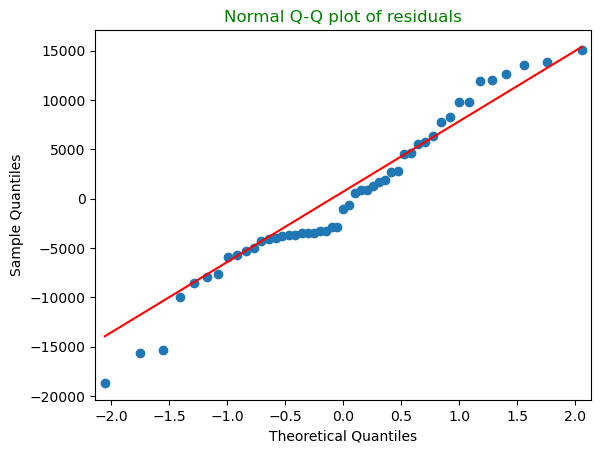

In [51]:
qqplot=sm.qqplot(model3.resid,line='q')
plt.title("Normal Q-Q plot of residuals", color = 'green')
plt.show()

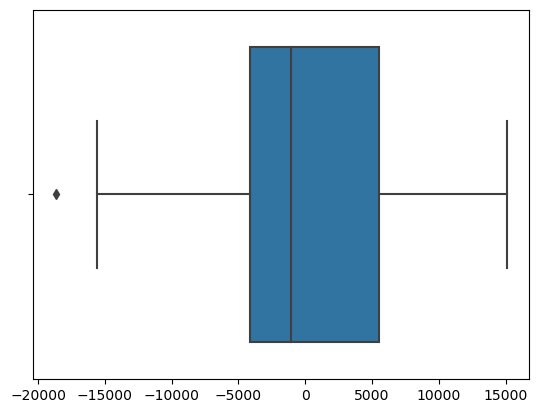

In [52]:
sns.boxplot(model3.resid)
plt.show()

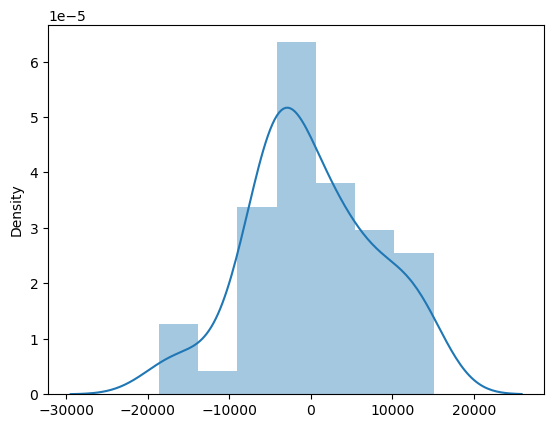

In [53]:
sns.distplot(model3.resid)
plt.show()

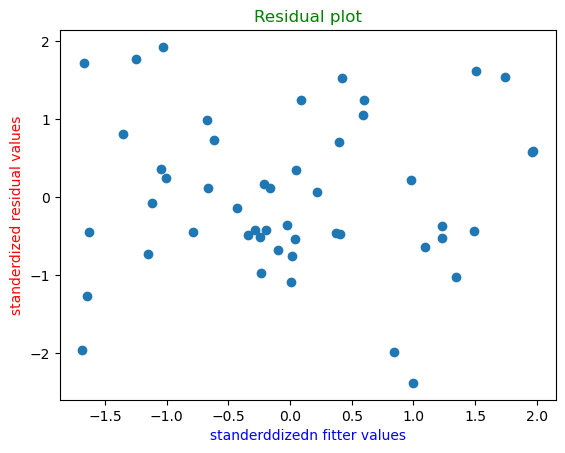

In [54]:
plt.scatter(get_standardized_values(model3.fittedvalues),get_standardized_values(model3.resid))


plt.title('Residual plot', color = 'green')
plt.ylabel('standerdized residual values', color = 'red')
plt.xlabel('standerddizedn fitter values', color = 'blue')
plt.show()

### Model3 has the least MSE Error with a good Rsquare value and acceptable P-Value. So, Model3 is taken as finalised model.

In [55]:
model_final=model3

In [56]:
created_models=pd.Series(['model','model_admin_sq','model_admin_sqrt','model_admin_log','model1','model_mar_sq','model_mar_sqrt','model2','model_rnd_sqrt','model3(final model)'])
rsquared=pd.Series([model.rsquared,model_admin_sq.rsquared,model_admin_sqrt.rsquared,model_admin_log.rsquared,model1.rsquared,model_mar_sq.rsquared,model_mar_sqrt.rsquared,model2.rsquared,model_rnd_sq.rsquared,model_rnd_sq.rsquared,model_final.rsquared])
rsquared_df=pd.DataFrame()
rsquared_df['models']=created_models
rsquared_df['rsquared']=rsquared

## Table of Rsquared values of all models:-

In [57]:
rsquared_df

,models,rsquared
0,model,0.950752
1,model_admin_sq,0.950829
2,model_admin_sqrt,0.950696
3,model_admin_log,0.950632
4,model1,0.950453
5,model_mar_sq,0.949162
6,model_mar_sqrt,0.950210
7,model2,0.946717
8,model_rnd_sqrt,0.855593
9,model3(final model),0.855593


## Predicting for New Values:-

In [58]:
new_value=pd.DataFrame(columns=['RnD_Spend','Administration','Marketing_Spend','State_California','State_Florida','State_NewYork'])
new_value.loc[0]=[150000,100000,300000,0,1,0]
new_value.loc[1]=[180000,50000,500000,0,0,1]
new_value

,RnD_Spend,Administration,Marketing_Spend,State_California,State_Florida,State_NewYork
0,150000,100000,300000,0,1,0
1,180000,50000,500000,0,0,1


In [59]:
model_final.predict(new_value)

0    176188.203757
1    199787.347632
dtype: float64